## Business Case:- : Predict H1N1 and Seasonal Flu Vaccines

* Can you predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors? In this challenge, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

* As of the launch of this competition, vaccines for the COVID-19 virus are still under development and not yet available. The competition will instead revisit the public health response to a different recent major respiratory disease pandemic. Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.
A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

* In this InClass competition, we will look at vaccination, a vital public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and a well-immunized community can further reduce the spread of diseases through "herd immunity."


#### Domian Name :- Healthcare and Public Health Sector

## Problem description :-

* Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine. Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.


## Domain Analysis

* Domain analysis is the process of studying and understanding a specific field or area to identify common concepts, requirements, and patterns. It involves gathering knowledge about the domain, analyzing its key components, and defining reusable models or frameworks that can be applied to similar problems. This helps in improving efficiency, consistency, and decision-making when developing solutions within that domain.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data1 = pd.read_csv("features.csv")
data1

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [3]:
data2 = pd.read_csv("labels.csv")
data2

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [4]:
pd.set_option("display.max_columns",None)

In [5]:
data = data1.merge(data2,on="respondent_id")
data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [6]:
data['vaccine_combined'] = data['h1n1_vaccine'] * 2 + data['seasonal_vaccine']

In [7]:
data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,vaccine_combined
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0,0


## Basic Check

* A basic check refers to an initial evaluation or validation process to ensure data quality, correctness, and consistency before further analysis or processing. This can include checking for missing values, duplicate entries, incorrect data types, or anomalies in the dataset. In machine learning, basic checks help identify potential issues that may impact model performance, such as class imbalances, feature distributions, or correlations. Performing these checks early in the pipeline ensures a solid foundation for accurate and reliable analysis or predictions.

In [8]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,vaccine_combined
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,0


In [9]:
data.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,vaccine_combined
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0,0


In [10]:
data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,vaccine_combined
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608,0.890516
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825,1.107220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000,3.000000


In [11]:
data.describe(include="O")

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

## EDA:- Exploratory Data Analysis

* Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to understand their structure, patterns, and relationships before applying machine learning models. It involves visualizing data through graphs, histograms, and box plots to detect trends, outliers, and missing values. EDA also includes statistical techniques such as correlation analysis, distribution checks, and feature selection to gain insights and improve data preprocessing. By performing EDA, data scientists can make informed decisions about data cleaning, feature engineering, and model selection, ultimately leading to better predictions and interpretations.

#### 1. Univariant Analysis

* Univariate analysis is the statistical examination of a single variable to understand its distribution, central tendency, and variability. It helps in identifying patterns, outliers, and underlying data characteristics using measures such as mean, median, mode, variance, and standard deviation. Visualization techniques like histograms, box plots, and density plots are commonly used to analyze the spread and shape of the data. This type of analysis is crucial for understanding individual features before moving to more complex analyses involving multiple variables.

#### 2. Baivariant Analysis

* Bivariate analysis is the statistical examination of the relationship between two variables to determine their correlation and dependency. It helps in understanding how one variable influences or interacts with another. Common techniques include scatter plots for visualizing relationships, correlation coefficients (such as Pearson or Spearman) for measuring the strength and direction of association, and cross-tabulation for categorical data analysis. This analysis is useful for identifying trends, patterns, and potential predictive relationships between variables in a dataset.

#### 3. Multivariant Analysis

* Multivariate analysis is the statistical examination of three or more variables simultaneously to understand complex relationships and interactions within a dataset. It helps in identifying patterns, dependencies, and hidden structures that may not be visible in univariate or bivariate analysis. Techniques such as multiple regression, principal component analysis (PCA), cluster analysis, and factor analysis are commonly used. This approach is essential in machine learning and data science for feature selection, dimensionality reduction, and improving model accuracy by considering multiple influencing factors together.

## Feature Engineering

* Feature engineering is the process of transforming raw data into meaningful features that improve the performance of a machine learning model. It involves selecting, creating, or modifying features to enhance their predictive power. Techniques include handling missing values, encoding categorical variables, scaling numerical features, creating interaction terms, and performing dimensionality reduction. Effective feature engineering helps models learn better patterns, reduces overfitting, and improves overall accuracy. It is a crucial step in the data preprocessing pipeline that directly impacts model performance.

### 1. Data Preprocessing

* Data preprocessing is the process of cleaning, transforming, and organizing raw data to make it suitable for machine learning models. It involves handling missing values, removing duplicates, encoding categorical variables, scaling numerical data, and normalizing distributions. Additionally, feature selection and extraction techniques help improve model performance by reducing noise and redundancy. Proper data preprocessing ensures that the dataset is consistent, accurate, and structured, leading to better learning and more reliable predictions.

In [13]:
data.drop(["h1n1_vaccine","seasonal_vaccine"],axis=1,inplace=True)

In [14]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,vaccine_combined
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [15]:
data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [16]:
def handle_missing_values(data, threshold=0.4):
    
    # Calculate missing value percentage for each column
    missing_percent = data.isnull().mean()

    # Identify columns to drop (more than 40% null values)
    cols_to_drop = missing_percent[missing_percent > threshold].index
    data = data.drop(columns=cols_to_drop)

    # Handle columns with 40% or fewer null values
    for col in data.columns:
        if data[col].isnull().sum() > 0:  # Only process columns with missing values
            if data[col].dtype == 'object':  # Categorical column
                data[col].fillna(data[col].mode()[0], inplace=True)
            else:  # Numerical column
                data[col].fillna(data[col].mean(), inplace=True)
    return data

In [17]:
data = handle_missing_values(data)

In [18]:
data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [19]:
data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,vaccine_combined
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.220312,0.329735,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000,1.000000,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,0


In [20]:
data.drop(["respondent_id"],axis=1,inplace=True)

In [21]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,vaccine_combined
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,0.329735,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


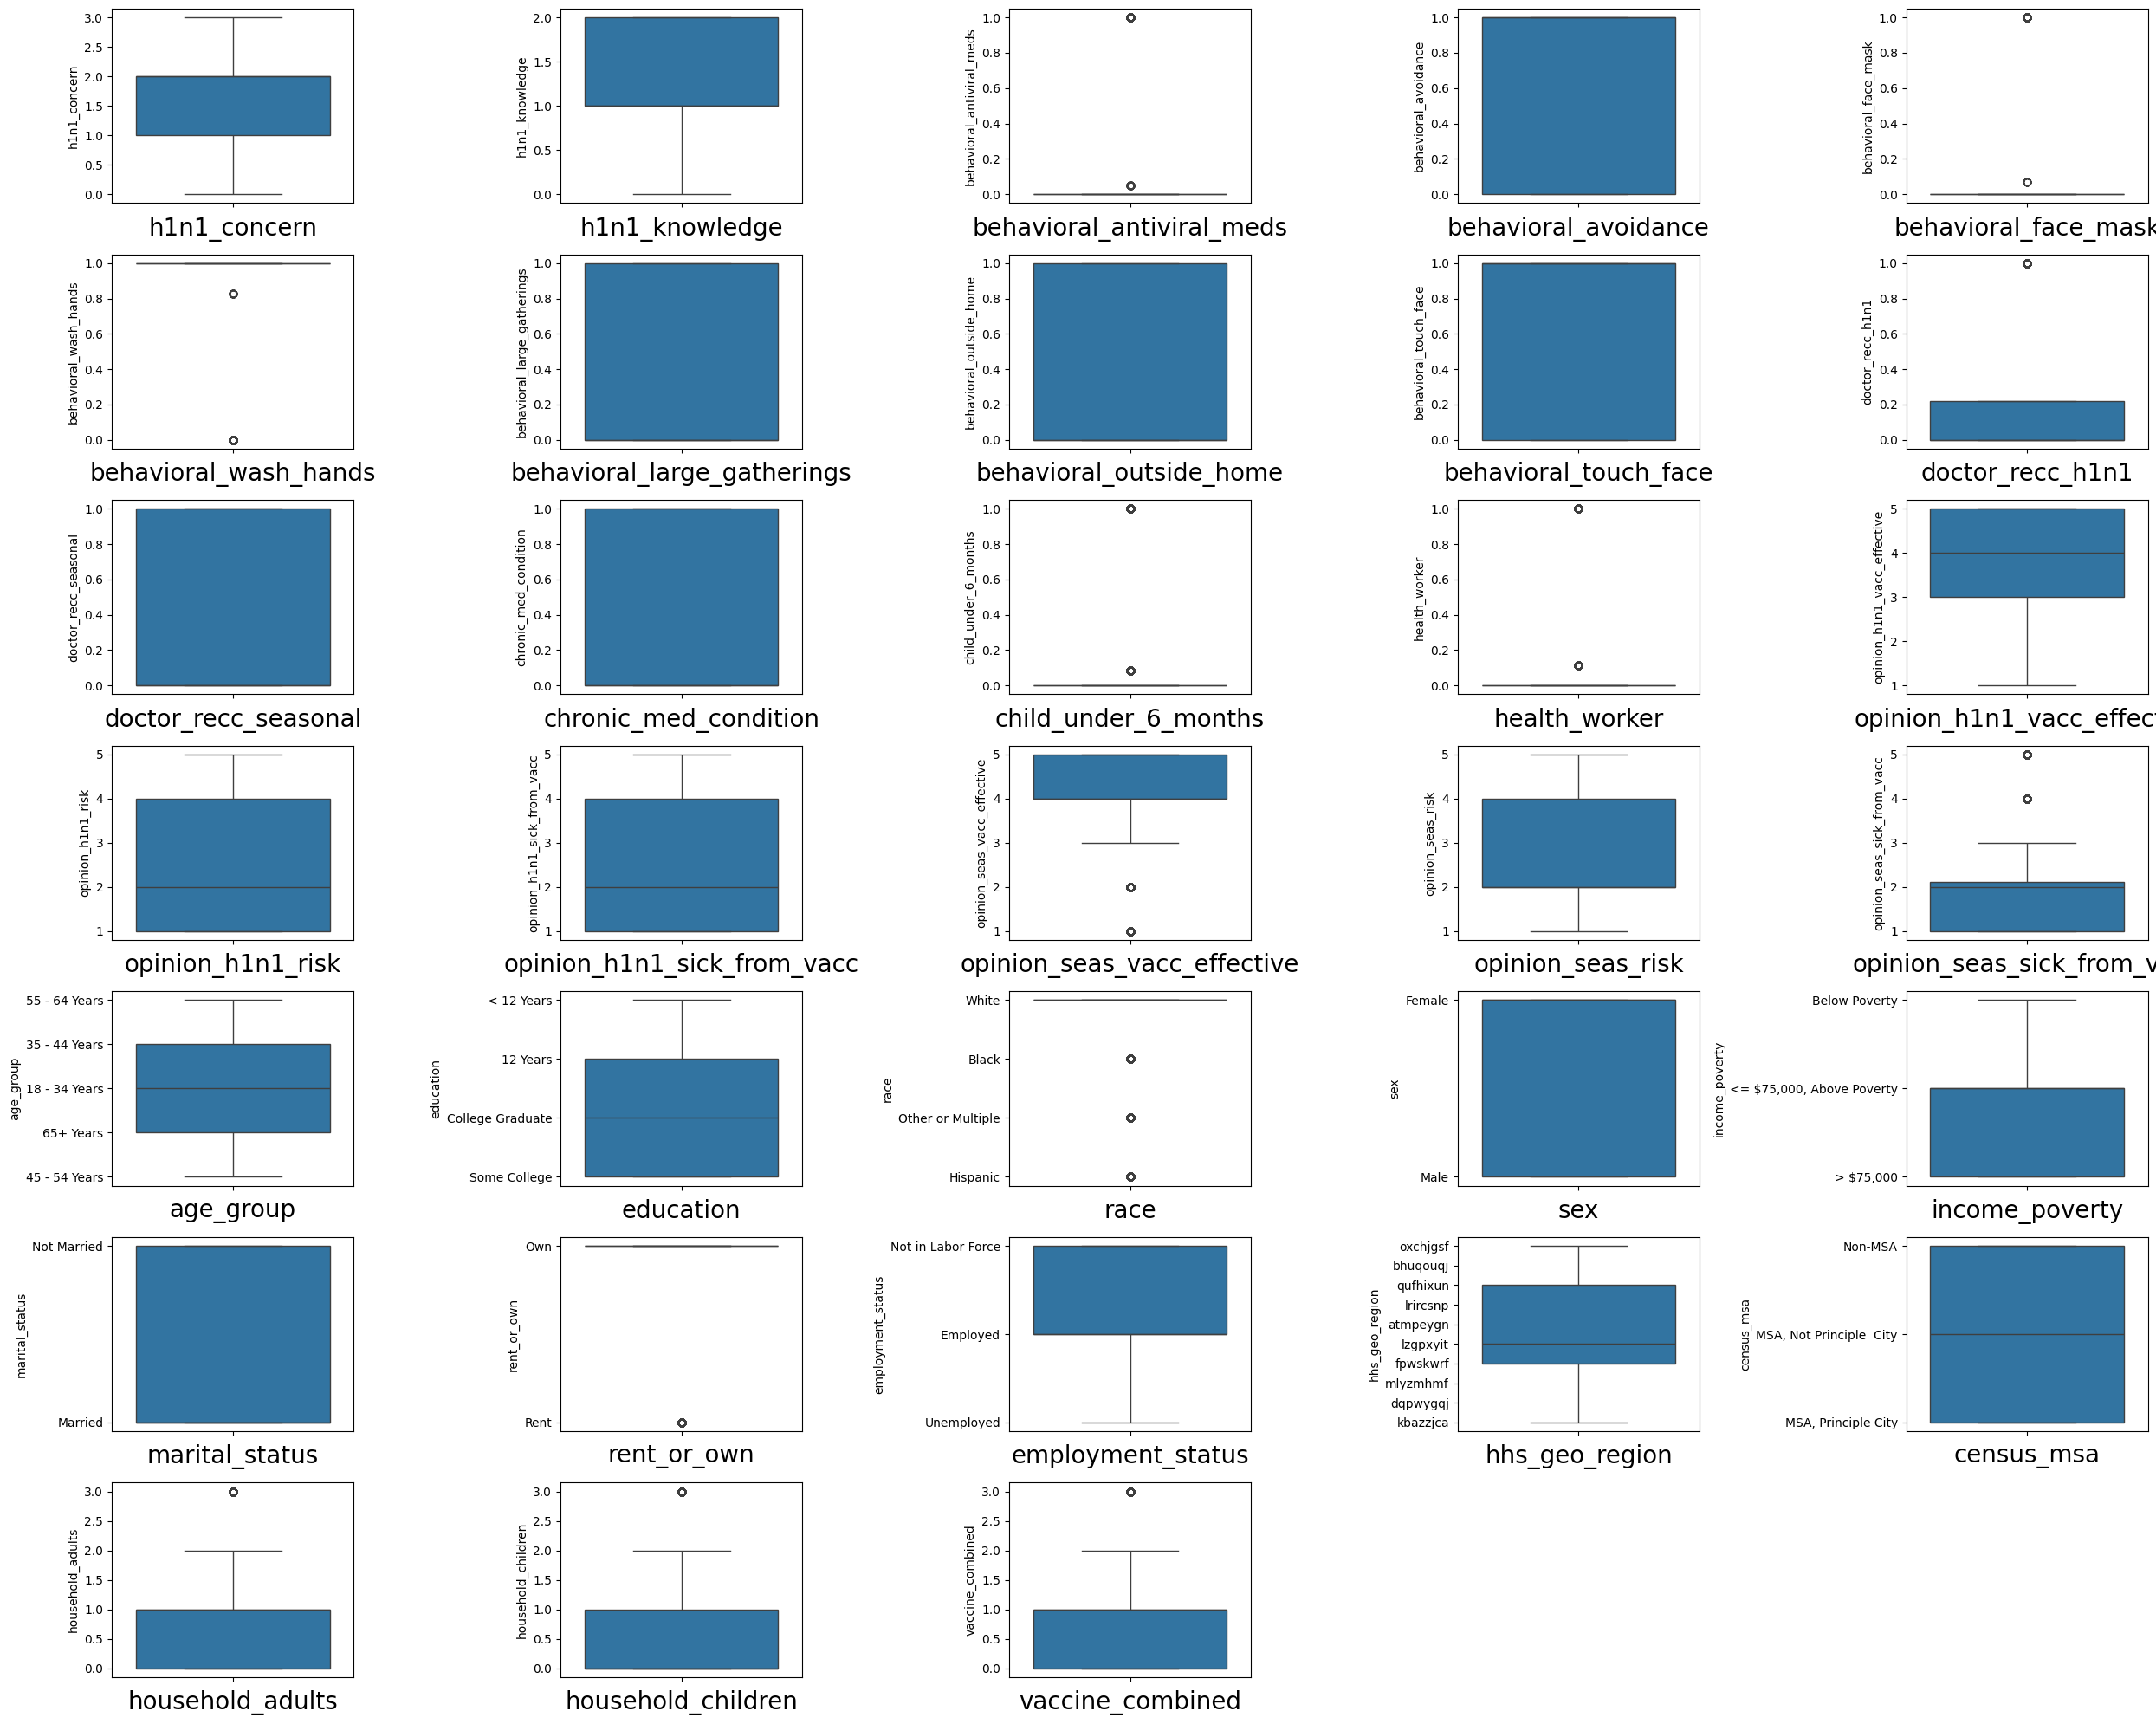

In [22]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 35:
        plt.subplot(7,5,plt_num)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plt_num += 1
plt.tight_layout()

In [23]:
def handle_outliers_iqr(data):
    if data is None or not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a valid Pandas DataFrame")

    # Select numerical columns (int64 and float64) but exclude binary columns (0/1)
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Exclude binary columns (assumed to have only 0s and 1s)
    non_binary_cols = [col for col in num_cols if data[col].nunique() > 2]

    # Exclude 'vaccine_combined' column from outlier handling
    if 'vaccine_combined' in non_binary_cols:
        non_binary_cols.remove('vaccine_combined')

    for col in non_binary_cols:
        Q1 = data[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = data[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Replace outliers with the median of the column
        median_value = data[col].median()
        data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median_value, data[col])

    return data

In [24]:
data = handle_outliers_iqr(data)

In [25]:
data["vaccine_combined"].unique()

array([0, 1, 3, 2], dtype=int64)

In [26]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,vaccine_combined
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,4.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,2.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.220312,0.329735,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,2.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


In [27]:
data["age_group"].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [28]:
def handle_age_column(data, age_column="age_group"):
    
    if data is None or not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a valid Pandas DataFrame")

    # Define mapping for age groups
    age_mapping = {
        '18 - 34 Years': 26,  # Midpoint of 18-34
        '35 - 44 Years': 39,  # Midpoint of 35-44
        '45 - 54 Years': 49,  # Midpoint of 45-54
        '55 - 64 Years': 59,  # Midpoint of 55-64
        '65+ Years': 70       # Approximate value for 65+
    }

    # Apply mapping
    if age_column in data.columns:
        data[age_column] = data[age_column].map(age_mapping)

    return data

In [29]:
data = handle_age_column(data, age_column="age_group")

In [30]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,vaccine_combined
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,4.0,1.0,2.0,59,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,2.0,39,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.220312,0.329735,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,26,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,70,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,2.0,49,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


In [31]:
data["education"].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College'],
      dtype=object)

In [32]:
data["education"] = data['education'].replace({"< 12 Years":"12th not completed","12 Years":"12th Pass","College Graduate":"Grduate","Some College":"College Dropout"})

In [33]:
data["education"].unique()

array(['12th not completed', '12th Pass', 'Grduate', 'College Dropout'],
      dtype=object)

In [34]:
from sklearn.preprocessing import OrdinalEncoder
education_order = [
    "12th not completed",  # 0
    "12th Pass",           # 1
    "College Dropout",     # 2
    "Grduate"             # 3
]
oe = OrdinalEncoder(categories=[education_order])
data[["education"]] = oe.fit_transform(data[["education"]])

In [35]:
data["education"].unique()

array([0., 1., 3., 2.])

In [36]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,vaccine_combined
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,4.0,1.0,2.0,59,0.0,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,2.0,39,1.0,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.220312,0.329735,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,26,3.0,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,70,1.0,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,2.0,49,2.0,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


In [37]:
data["race"].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["race"] = le.fit_transform(data["race"])

In [39]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,vaccine_combined
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,4.0,1.0,2.0,59,0.0,3,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,2.0,39,1.0,3,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.220312,0.329735,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,26,3.0,3,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,70,1.0,3,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,2.0,49,2.0,3,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


In [40]:
data["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [41]:
data["marital_status"].unique()

array(['Not Married', 'Married'], dtype=object)

In [42]:
data["rent_or_own"].unique()

array(['Own', 'Rent'], dtype=object)

In [43]:
data["employment_status"].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed'], dtype=object)

In [44]:
data["employment_status"] = data["employment_status"].replace({"Not in Labor Force":"Not_LaborForce"})

In [45]:
data["employment_status"].unique()

array(['Not_LaborForce', 'Employed', 'Unemployed'], dtype=object)

In [46]:
data["income_poverty"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

In [47]:
data["hhs_geo_region"].unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [48]:
data["census_msa"].unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [49]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
df = pd.get_dummies(data["sex"],dtype="int64",prefix="sex")
df1 = pd.get_dummies(data["marital_status"],dtype="int64",prefix="marital_status")
df2 = pd.get_dummies(data["rent_or_own"],dtype="int64",prefix="rent_or_own")
df3 = pd.get_dummies(data["employment_status"],dtype="int64",prefix="employment_status")

In [50]:
data = pd.concat([data,df,df1,df2,df3],axis=1)
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,vaccine_combined,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not_LaborForce,employment_status_Unemployed
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,4.0,1.0,2.0,59,0.0,3,Female,Below Poverty,Not Married,Own,Not_LaborForce,oxchjgsf,Non-MSA,0.0,0.0,0,1,0,0,1,1,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,2.0,39,1.0,3,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1,0,1,0,1,0,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.220312,0.329735,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,26,3.0,3,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0,1,0,1,1,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,70,1.0,3,Female,Below Poverty,Not Married,Rent,Not_LaborForce,lrircsnp,"MSA, Principle City",0.0,0.0,1,1,0,0,1,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,2.0,49,2.0,3,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,1,0,1,0,1,0,1,0,0


In [51]:
data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'vaccine_combined',
       'sex_Female', 'sex_Male', 'marital_status_Married',
       'marital_status_Not Married', 'rent_or_own_Own', 'rent_or_own_Rent',
       'employment_status_Employed', 'employment_status_Not_LaborForce',
       'emplo

In [52]:
data.drop(["sex","marital_status","rent_or_own","employment_status"],axis=1,inplace=True)

In [53]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,income_poverty,hhs_geo_region,census_msa,household_adults,household_children,vaccine_combined,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not_LaborForce,employment_status_Unemployed
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,4.0,1.0,2.0,59,0.0,3,Below Poverty,oxchjgsf,Non-MSA,0.0,0.0,0,1,0,0,1,1,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,2.0,39,1.0,3,Below Poverty,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1,0,1,0,1,0,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.220312,0.329735,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,26,3.0,3,"<= $75,000, Above Poverty",qufhixun,"MSA, Not Principle City",2.0,0.0,0,0,1,0,1,1,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,70,1.0,3,Below Poverty,lrircsnp,"MSA, Principle City",0.0,0.0,1,1,0,0,1,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,2.0,49,2.0,3,"<= $75,000, Above Poverty",qufhixun,"MSA, Not Principle City",1.0,0.0,0,1,0,1,0,1,0,1,0,0


In [54]:
data["income_poverty"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

In [55]:
data["income_poverty"] = data["income_poverty"].replace({"Below Poverty":"Below_Poverty","<= $75,000":"Under_75000","> $75,000":"Above_75000"})

In [56]:
data["income_poverty"].unique()

array(['Below_Poverty', '<= $75,000, Above Poverty', 'Above_75000'],
      dtype=object)

In [57]:
data["hhs_geo_region"].unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [58]:
data["census_msa"].unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [59]:
data["census_msa"] = data["census_msa"].replace({"Non-MSA":"Rural_Area","MSA, Not Principle  City":"Suburban_Area","MSA, Principle City":"Metropolitan_Area"})

In [60]:
data["census_msa"].unique()

array(['Rural_Area', 'Suburban_Area', 'Metropolitan_Area'], dtype=object)

In [61]:
data["income_poverty"] = le.fit_transform(data["income_poverty"])
data["hhs_geo_region"] = le.fit_transform(data["hhs_geo_region"])

In [62]:
df4 = pd.get_dummies(data["census_msa"],dtype="int64",prefix="census_msa")

In [63]:
data = pd.concat([data,df4],axis=1)

In [64]:
data.drop(["census_msa"],axis=1,inplace=True)

In [65]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,income_poverty,hhs_geo_region,household_adults,household_children,vaccine_combined,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not_LaborForce,employment_status_Unemployed,census_msa_Metropolitan_Area,census_msa_Rural_Area,census_msa_Suburban_Area
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,4.0,1.0,2.0,59,0.0,3,2,8,0.0,0.0,0,1,0,0,1,1,0,0,1,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,2.0,39,1.0,3,2,1,0.0,0.0,1,0,1,0,1,0,1,1,0,0,0,0,1
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.220312,0.329735,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,26,3.0,3,0,9,2.0,0.0,0,0,1,0,1,1,0,1,0,0,0,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,70,1.0,3,2,5,0.0,0.0,1,1,0,0,1,0,1,0,1,0,1,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,2.0,49,2.0,3,0,9,1.0,0.0,0,1,0,1,0,1,0,1,0,0,0,0,1


In [66]:
data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'income_poverty', 'hhs_geo_region',
       'household_adults', 'household_children', 'vaccine_combined',
       'sex_Female', 'sex_Male', 'marital_status_Married',
       'marital_status_Not Married', 'rent_or_own_Own', 'rent_or_own_Rent',
       'employment_status_Employed', 'employment_status_Not_LaborForce',
       'employment_status_Unemployed', 'census_msa_Metropolitan_Area',
       'census_msa_Rural

In [67]:
data.drop(["behavioral_antiviral_meds","behavioral_face_mask","behavioral_wash_hands","child_under_6_months","health_worker"],axis=1,inplace=True)

### 2. Feature Selection

<Axes: >

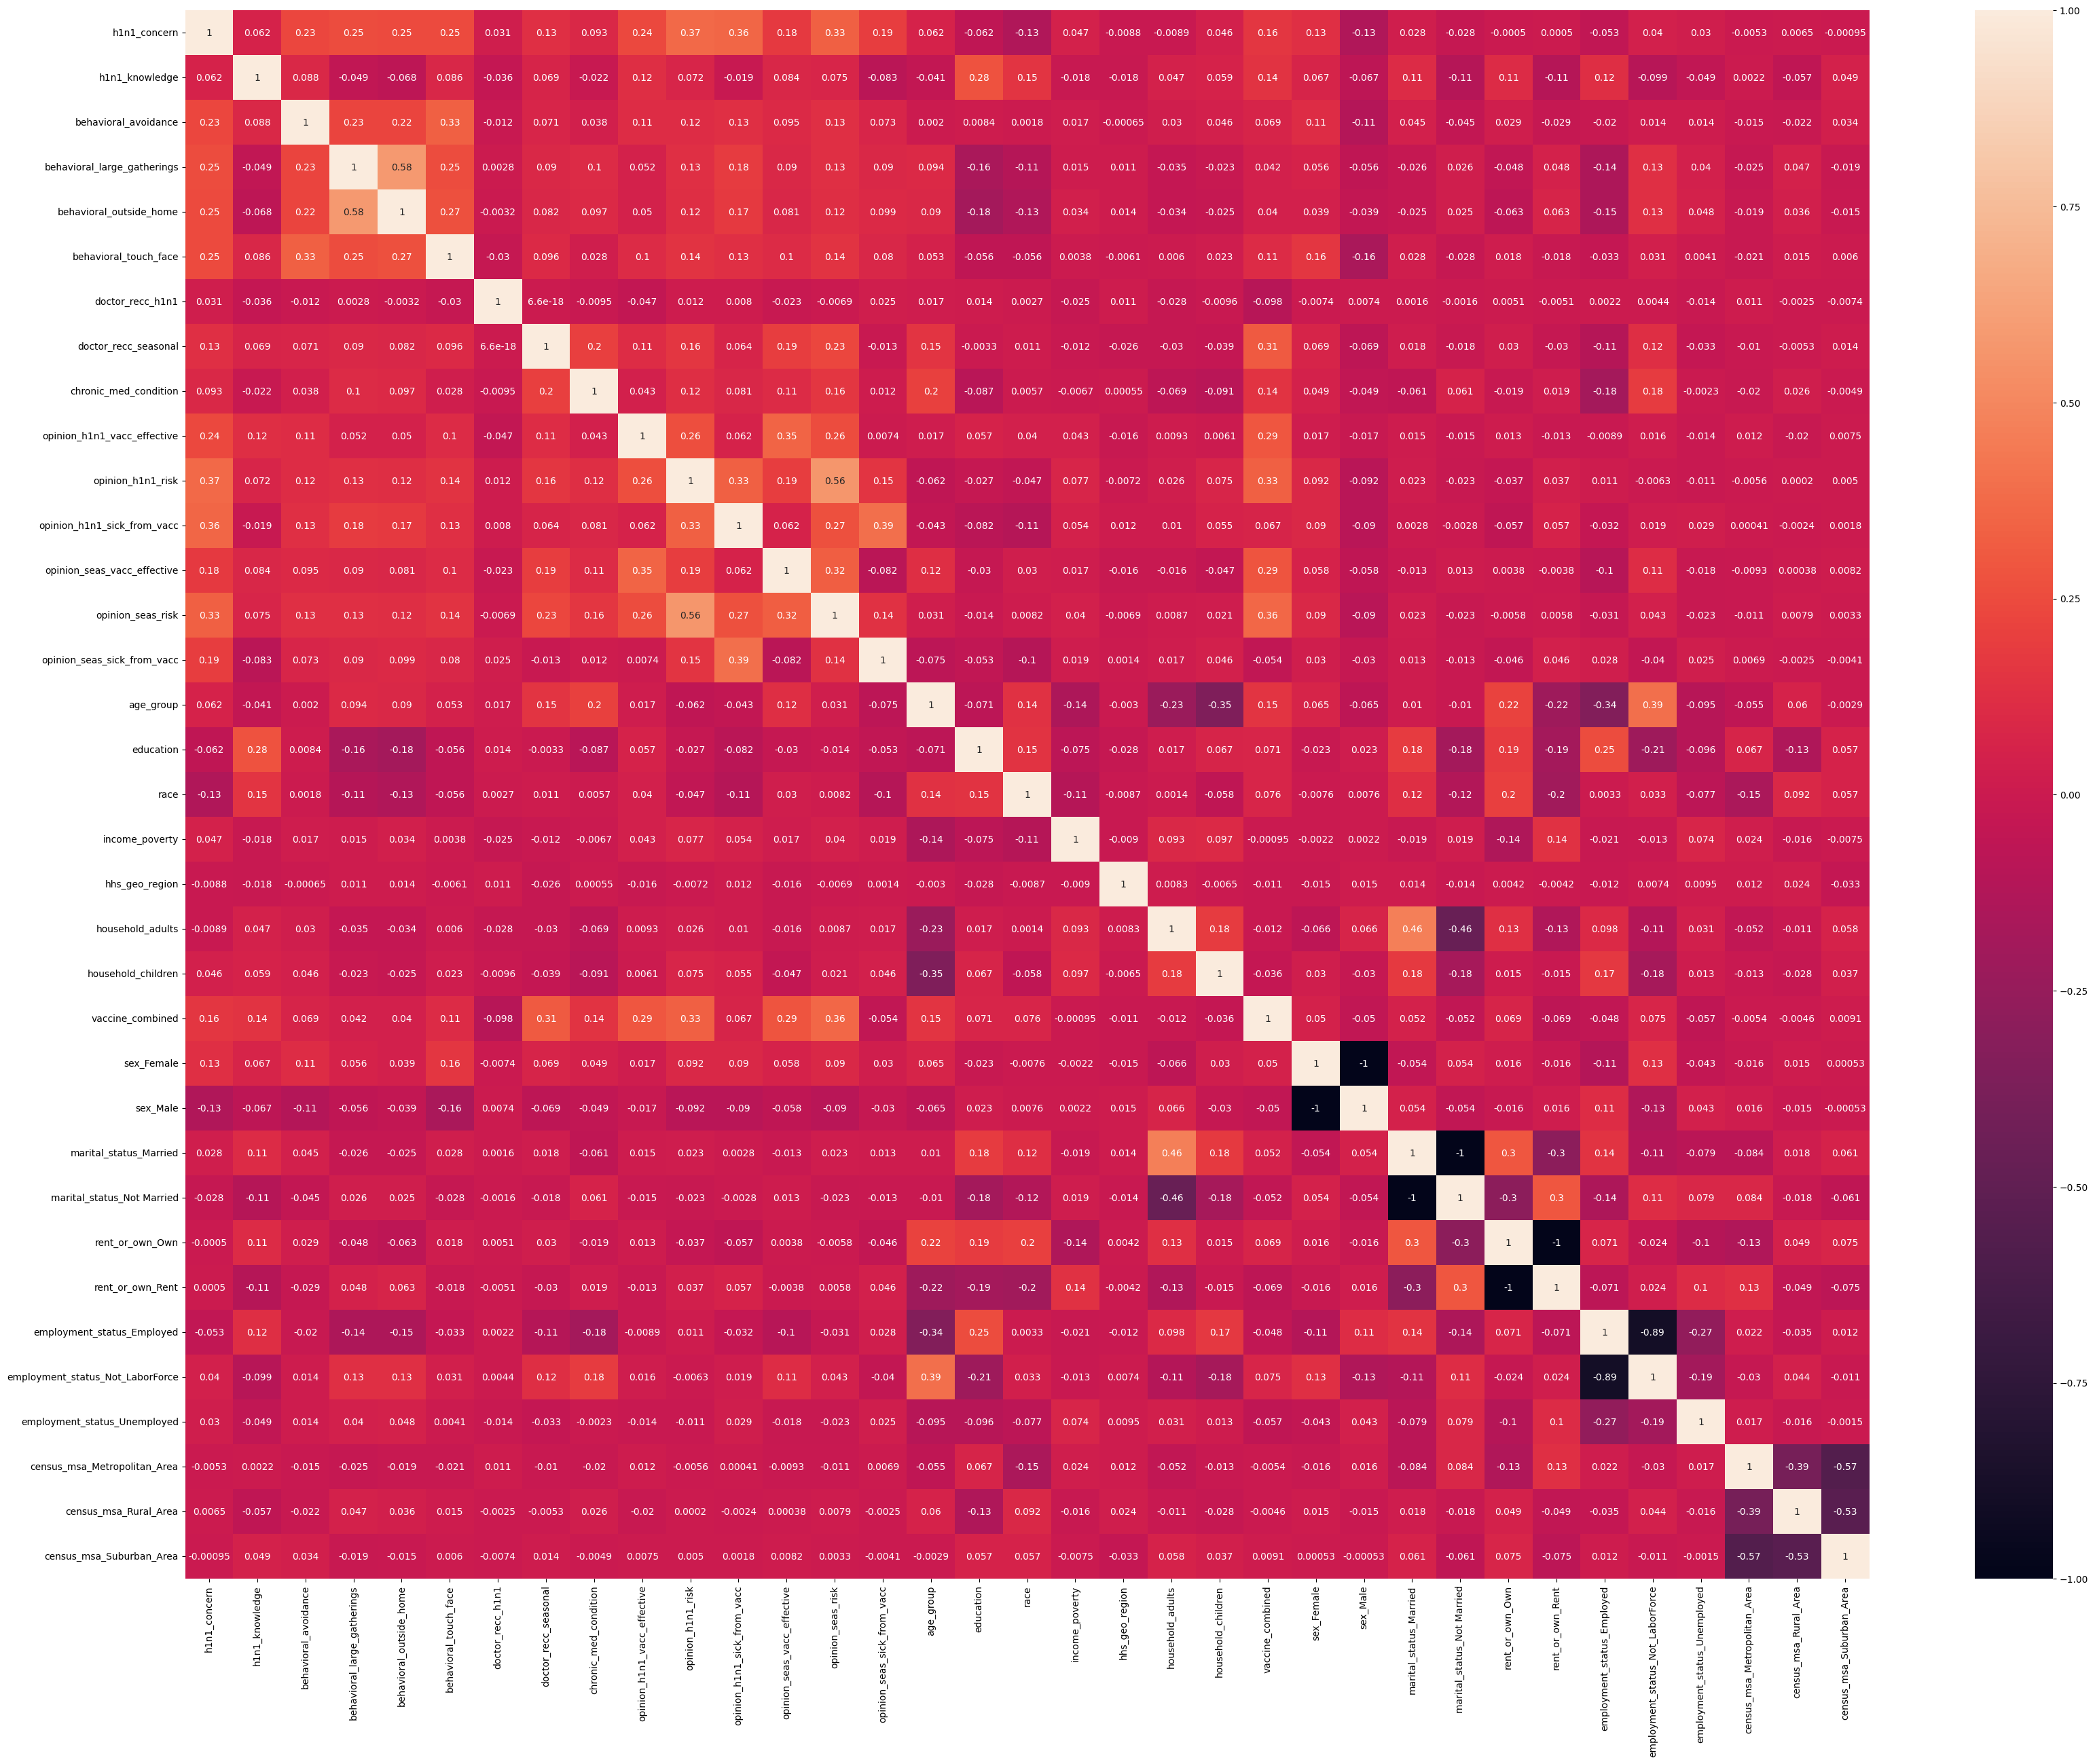

In [68]:
plt.figure(figsize=(40,30))
sns.heatmap(data.corr(),annot=True)

## Model Creation

In [69]:
x = data.drop(["vaccine_combined"],axis=1)
y = data["vaccine_combined"]

In [70]:
x

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,income_poverty,hhs_geo_region,household_adults,household_children,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not_LaborForce,employment_status_Unemployed,census_msa_Metropolitan_Area,census_msa_Rural_Area,census_msa_Suburban_Area
0,1.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,3.0,1.0,2.0,4.0,1.0,2.0,59,0.0,3,2,8,0.0,0.0,1,0,0,1,1,0,0,1,0,0,1,0
1,3.0,2.0,1.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,5.0,4.0,4.0,4.0,2.0,2.0,39,1.0,3,2,1,0.0,0.0,0,1,0,1,0,1,1,0,0,0,0,1
2,1.0,1.0,1.0,0.0,0.0,0.000000,0.220312,0.329735,1.0,3.0,1.0,1.0,4.0,1.0,2.0,26,3.0,3,0,9,2.0,0.0,0,1,0,1,1,0,1,0,0,0,0,1
3,1.0,1.0,1.0,1.0,0.0,0.000000,0.000000,1.000000,1.0,3.0,3.0,5.0,5.0,4.0,1.0,70,1.0,3,2,5,0.0,0.0,1,0,0,1,0,1,0,1,0,1,0,0
4,2.0,1.0,1.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,3.0,3.0,2.0,3.0,1.0,2.0,49,2.0,3,0,9,1.0,0.0,1,0,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,3.0,1.0,1.0,5.0,2.0,2.0,70,2.0,3,0,9,0.0,0.0,1,0,0,1,1,0,0,1,0,0,1,0
26703,1.0,2.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,4.0,2.0,2.0,5.0,1.0,1.0,26,3.0,3,0,6,1.0,0.0,0,1,0,1,0,1,1,0,0,1,0,0
26704,2.0,2.0,1.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,4.0,4.0,2.0,5.0,4.0,2.0,59,2.0,3,0,6,0.0,0.0,1,0,0,1,1,0,1,0,0,0,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.677264,0.000000,0.000000,0.0,3.0,1.0,2.0,4.0,1.0,2.0,26,2.0,1,0,5,1.0,0.0,1,0,1,0,0,1,1,0,0,0,1,0


In [71]:
y

0        0
1        1
2        0
3        1
4        0
        ..
26702    0
26703    0
26704    1
26705    0
26706    0
Name: vaccine_combined, Length: 26707, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [73]:
x_train

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,income_poverty,hhs_geo_region,household_adults,household_children,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not_LaborForce,employment_status_Unemployed,census_msa_Metropolitan_Area,census_msa_Rural_Area,census_msa_Suburban_Area
21237,2.0,1.0,1.000000,1.0,1.0,1.0,0.000000,0.000000,1.0,5.0,1.0,4.0,5.0,1.0,2.0,59,1.0,3,0,9,0.0,0.0,0,1,0,1,1,0,0,1,0,0,0,1
10831,1.0,1.0,1.000000,0.0,1.0,1.0,0.000000,0.000000,0.0,3.0,2.0,1.0,4.0,2.0,1.0,26,1.0,3,0,7,1.0,0.0,0,1,0,1,0,1,1,0,0,0,0,1
9298,1.0,1.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,4.0,2.0,1.0,4.0,2.0,1.0,49,3.0,3,1,5,2.0,0.0,0,1,1,0,0,1,0,1,0,1,0,0
18584,1.0,2.0,1.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,4.0,4.0,1.0,5.0,2.0,2.0,26,1.0,3,0,8,1.0,0.0,1,0,1,0,1,0,0,1,0,0,1,0
14999,2.0,1.0,1.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,2.0,1.0,4.0,4.0,2.0,2.0,59,3.0,3,1,9,1.0,2.0,0,1,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1.0,1.0,1.000000,1.0,1.0,1.0,0.000000,0.000000,0.0,3.0,1.0,1.0,4.0,2.0,1.0,70,1.0,3,0,0,0.0,0.0,1,0,0,1,0,1,0,1,0,0,1,0
19648,1.0,1.0,0.000000,0.0,0.0,1.0,0.220312,0.329735,1.0,5.0,1.0,2.0,5.0,4.0,2.0,70,2.0,3,0,9,1.0,0.0,1,0,0,1,1,0,0,1,0,0,1,0
9845,2.0,1.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,5.0,2.0,2.0,4.0,4.0,2.0,70,3.0,3,1,1,1.0,0.0,0,1,1,0,1,0,0,1,0,0,1,0
10799,2.0,2.0,0.725612,0.0,0.0,1.0,0.000000,1.000000,1.0,4.0,4.0,2.0,5.0,4.0,2.0,70,3.0,3,1,9,1.0,0.0,1,0,1,0,1,0,0,1,0,1,0,0


In [74]:
x_test

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,income_poverty,hhs_geo_region,household_adults,household_children,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not_LaborForce,employment_status_Unemployed,census_msa_Metropolitan_Area,census_msa_Rural_Area,census_msa_Suburban_Area
17088,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.000000,1.0,1.0,5.0,4.0,1.0,70,3.0,3,0,9,0.0,0.0,1,0,0,1,0,1,0,1,0,1,0,0
1971,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.000000,2.0,5.0,5.0,2.0,1.0,70,2.0,3,2,7,1.0,0.0,1,0,1,0,0,1,0,1,0,0,0,1
16698,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.850623,5.0,4.0,4.0,4.0,1.0,49,3.0,3,1,6,2.0,0.0,0,1,1,0,1,0,1,0,0,1,0,0
22074,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.000000,2.0,4.0,4.0,5.0,2.0,39,3.0,2,0,4,0.0,0.0,1,0,0,1,1,0,1,0,0,0,0,1
21458,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,5.000000,4.0,2.0,5.0,4.0,2.0,59,2.0,3,0,7,1.0,0.0,1,0,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.000000,1.0,1.0,4.0,1.0,1.0,70,1.0,3,0,5,1.0,0.0,1,0,0,1,1,0,0,1,0,0,0,1
25726,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5.000000,2.0,4.0,4.0,2.0,2.0,49,3.0,0,1,3,1.0,2.0,1,0,1,0,1,0,1,0,0,0,0,1
23996,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.000000,2.0,2.0,5.0,2.0,2.0,26,3.0,2,0,3,1.0,0.0,1,0,0,1,1,0,1,0,0,1,0,0
19581,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.000000,1.0,5.0,4.0,2.0,2.0,70,3.0,3,0,2,1.0,0.0,1,0,1,0,1,0,0,1,0,0,0,1


In [75]:
data["vaccine_combined"].value_counts()

vaccine_combined
0    13295
1     7738
3     4697
2      977
Name: count, dtype: int64

In [76]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)

In [77]:
from collections import Counter
print("Before",Counter(y_train))
print("After",Counter(y_train_smote))

Before Counter({0: 9265, 1: 5489, 3: 3263, 2: 677})
After Counter({0: 9265, 1: 9265, 2: 9265, 3: 9265})


## Model Selection

### 1. Logistic Regression Algorithm

In [78]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [79]:
y_lr = LR.predict(x_test)

In [80]:
from sklearn.metrics import *

In [81]:
accuracy_score(y_test,y_lr)

0.6292275053038812

In [82]:
y_tlr = LR.predict(x_train)

In [83]:
accuracy_score(y_train,y_tlr)

0.6272065903498448

In [84]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76      4030
           1       0.54      0.49      0.52      2249
           2       0.00      0.00      0.00       300
           3       0.51      0.38      0.44      1434

    accuracy                           0.63      8013
   macro avg       0.44      0.43      0.43      8013
weighted avg       0.59      0.63      0.60      8013



## Decision Tree Algorithm

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

ERROR! Session/line number was not unique in database. History logging moved to new session 1408


DecisionTreeClassifier()

In [86]:
y_dt = dt.predict(x_test)

In [87]:
accuracy_score(y_test,y_dt)

0.5074254336702858

In [88]:
y_tdt = dt.predict(x_train)

In [89]:
accuracy_score(y_train,y_tdt)

1.0

In [90]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      4030
           1       0.40      0.43      0.42      2249
           2       0.07      0.09      0.08       300
           3       0.35      0.34      0.35      1434

    accuracy                           0.51      8013
   macro avg       0.37      0.37      0.37      8013
weighted avg       0.51      0.51      0.51      8013



## Bagging Algorithm

In [91]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
bg.fit(x_train,y_train)

BaggingClassifier()

In [92]:
y_bg = bg.predict(x_test)

In [93]:
accuracy_score(y_test,y_bg)

0.6189941345313865

In [94]:
y_tbg = bg.predict(x_train)

In [95]:
accuracy_score(y_train,y_tbg)

0.9794051567347812

In [96]:
print(classification_report(y_test,y_bg))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      4030
           1       0.51      0.51      0.51      2249
           2       0.16      0.03      0.05       300
           3       0.51      0.36      0.42      1434

    accuracy                           0.62      8013
   macro avg       0.47      0.43      0.43      8013
weighted avg       0.59      0.62      0.60      8013



## Random Forest Algorithm

In [97]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(x_train,y_train)

RandomForestClassifier()

In [98]:
y_rm = rm.predict(x_test)

In [99]:
accuracy_score(y_test,y_rm)

0.6513166105079247

In [100]:
y_trm = rm.predict(x_train)

In [101]:
accuracy_score(y_train,y_trm)

1.0

In [102]:
print(classification_report(y_test,y_rm))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77      4030
           1       0.56      0.54      0.55      2249
           2       0.00      0.00      0.00       300
           3       0.59      0.40      0.47      1434

    accuracy                           0.65      8013
   macro avg       0.46      0.45      0.45      8013
weighted avg       0.62      0.65      0.63      8013



## Gradiant Boosting Algorithm

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [104]:
y_gb = gb.predict(x_test)

In [105]:
accuracy_score(y_test,y_gb)

0.6631723449394733

In [106]:
y_tgb = gb.predict(x_train)

In [107]:
accuracy_score(y_train,y_tgb)

0.6702685353589387

In [108]:
print(classification_report(y_test,y_gb))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      4030
           1       0.57      0.55      0.56      2249
           2       0.40      0.02      0.04       300
           3       0.60      0.44      0.51      1434

    accuracy                           0.66      8013
   macro avg       0.57      0.47      0.47      8013
weighted avg       0.64      0.66      0.64      8013



## XGBoost Algorithm

In [109]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [110]:
y_xgb = xgb.predict(x_test)

In [111]:
accuracy_score(y_test,y_xgb)

0.6535629601896917

In [112]:
y_txgb = xgb.predict(x_train)

In [113]:
accuracy_score(y_train,y_txgb)

0.8334224884989836

In [114]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      4030
           1       0.56      0.55      0.55      2249
           2       0.34      0.05      0.09       300
           3       0.56      0.43      0.48      1434

    accuracy                           0.65      8013
   macro avg       0.55      0.47      0.48      8013
weighted avg       0.63      0.65      0.64      8013



## ANN:- Artficial Neural Network Algorithm

In [115]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann.fit(x_train,y_train)

MLPClassifier()

In [116]:
y_ann = ann.predict(x_test)

In [117]:
accuracy_score(y_test,y_ann)

0.6506926244852115

In [118]:
y_tann = ann.predict(x_train)

In [119]:
accuracy_score(y_train,y_tann)

0.6660425805071146

In [120]:
print(classification_report(y_test,y_ann))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      4030
           1       0.55      0.54      0.55      2249
           2       0.26      0.02      0.03       300
           3       0.54      0.47      0.50      1434

    accuracy                           0.65      8013
   macro avg       0.52      0.46      0.46      8013
weighted avg       0.63      0.65      0.63      8013



<div style="text-align: center;">
    <b style="font-size: 30px;">Thank you</b>
</div>